# 프로젝트 : 나랑 닮은 연예인을 찾아보자

지금부터는 위에서 배운 내용을 토대로 연예인 사진과 나를 비교해 보는 시간을 갖도록 하겠습니다!

## Step1. 사진 모으기

비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

### 1. 내 사진 찍기

   - 내 사진을 2장 이상 포함합시다.
   - 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
   - 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.

### 2. 비교할 연예인 사진 모으기

   - 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
   - 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

## Step2. 얼굴 영역 자르기

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

               [ 힌 트 ]
       - from PIL import Image
       - face = get_gropped_face(image_path)
       - pillow_image = Image.fromarray(face)
       - pillow_image.save(path_to_save)

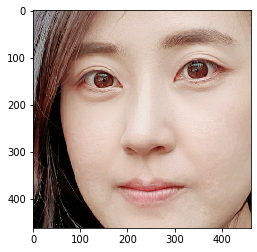

In [1]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image) # 이미지에서 얼굴 영역의 좌표
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그리기

    return cropped_face

image_path = os.getenv('HOME')+'/practice/face_embedding/images/김명진.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)


## Step3. 얼굴 영역의 임베딩 추출하기

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 `face_recognition` 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

   * `def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
   * `def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [2]:
import os

dir_path = os.getenv('HOME')+'/practice/face_embedding/images'
file_list = os.listdir(dir_path)

image_file = os.path.join(dir_path, '김명진.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 디렉토리 안에 있는 모든 이미지의 얼굴 영역을 가지고 
# 얼굴 임베딩 벡터를 구해서 dict구조에 담아 리턴하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = face_recognition.face_encodings(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담김. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

# get_face_embedding_dict() 함수가 잘 만들어졌는지 확인

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['김명진']

array([-0.03802267,  0.03650511,  0.04588761, -0.07798089, -0.11839608,
       -0.03982073, -0.10681232, -0.10311401,  0.08834859, -0.15241468,
        0.1660679 , -0.14066847, -0.24020083,  0.01900613, -0.06244757,
        0.20726617, -0.15405288, -0.10205422, -0.02331331,  0.00691721,
        0.06180916,  0.0699673 , -0.02666263,  0.06487178, -0.12850973,
       -0.30188259, -0.10462579, -0.0441455 , -0.03640671, -0.04029337,
       -0.0868605 ,  0.0857689 , -0.12781443, -0.00305185,  0.02566117,
        0.08783465,  0.01637735, -0.09113199,  0.15049225,  0.02894835,
       -0.27998805,  0.06943542,  0.0860893 ,  0.21960795,  0.16897266,
        0.00682693,  0.02001595, -0.18141884,  0.10527361, -0.15881631,
        0.01721376,  0.11509708,  0.03794366,  0.05528657,  0.02608874,
       -0.13116899,  0.04819739,  0.13404511, -0.14127703,  0.02148675,
        0.12870541, -0.0331791 ,  0.03011343, -0.11421134,  0.22703208,
        0.04855661, -0.12266468, -0.17038564,  0.1363377 , -0.14

## Step4. 모은 연예인들과 비교하기

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 `get_nearest_face(name, top=5)` 함수들을 응용하면 손쉽게 수행 가능합니다.

In [3]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# name1과 name2의 거리를 비교하는 함수를 생성하되, 
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('김명진')   

# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 
# trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [4]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) 
    #  모든 이미지 파일에 대한 얼굴 임베딩 딕셔너리를 오름차순으로 정렬(기준: 김명진과의 임베딩 벡터 거리 함수)

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [5]:
# 김명진과 가장 닮은 사람은 누굴까요?
get_nearest_face('김명진')

순위 1 : 이름(김명진1), 거리(0.3233226250502708)
순위 2 : 이름(김연아), 거리(0.3691797041105264)
순위 3 : 이름(박진희), 거리(0.37357191616504315)
순위 4 : 이름(한채아), 거리(0.39145797266143206)
순위 5 : 이름(수지), 거리(0.39261986704972557)


## Step5. 다양한 재미있는 시각화 시도해 보기

비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎

In [ ]:
show_img = 

plt.imshow(show_img)

## [ 루브릭 ]

1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다. <br/>
	닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다. <br/>
	다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.

3. 다양하고 재미있는 결과 시각화를 시도하였다. <br/>
	matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.

## [ 회 고 ]

1. 이번 프로젝트에서 어려웠던 점: 일단 코드 이해가 어려워 코드 구현은 상상도 못하겠다는 좌절감 ㅠㅠ

2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.

- 알아낸 점: 지난번에 이용한 face detective를 다른 방법으로도 활용할 수 있다는 점. 
             그리고 임베딩의 엄청난 능력

- 모호한 점: 임베딩의 코드 구현이 아직도 헷갈림.  
            재미있는 시각화 구현이라는 점이 무슨말인지... 창의성이 부족해서 이해가 잘 안감

3. 루브릭 평가 지표를 맞추기 위해 시도한 것들.

- 기존 이미지보다 더 많은 이미지를 input함
- 이미지 출력에 대해 다시 공부

